In [1]:
import matplotlib.pyplot as plt

In [2]:
!pwd

/content


In [3]:
!ls

blog.txt  laptop14.txt	news.txt  res16.txt  sample_data  total.txt  youtube.txt


In [4]:
TAG_TO_SPECIAL = {"POS": ("<pos>", "</pos>"),
                  "NEG": ("<neg>", "</neg>"), "NEU": ("<neu>", "</neu>")}
OPINION_TOKEN = "<opinion>"

In [5]:
def read_file(data_path):
    """
    Read data from file, each line is: sent####labels
    Return List[List[word]], List[Tuple]
    """
    sents, labels = [], []
    with open(data_path, 'r', encoding='UTF-8') as fp:
        words, labels = [], []
        for line in fp:
            line = line.strip()
            if line != '':
                words, tuples = line.split('####')
                sents.append(words.split())
                labels.append(eval(tuples))
    print(f"{data_path.split('/')[-1]}\tTotal examples = {len(sents)} ")
    return sents, labels


In [6]:
def prepare_aste_universal(data_dir, data_type_file="train"):
    data_path = f"{data_dir}/{data_type_file}.txt"
    sents, labels = read_file(data_path)
    # inputs = [detokenize(" ".join(s)) for s in sents]
    inputs = [" ".join(s) for s in sents]

    targets = []
    for i, label in enumerate(labels):
        target_str = ""
        for tri in label:
            if len(tri[0]) == 1:
                aspect = sents[i][tri[0][0]]
            else:
                start_idx, end_idx = tri[0][0], tri[0][-1]
                aspect = ' '.join(sents[i][start_idx:end_idx+1])
            if len(tri[1]) == 1:
                opinion = sents[i][tri[1][0]]
            else:
                start_idx, end_idx = tri[1][0], tri[1][-1]
                opinion = ' '.join(sents[i][start_idx:end_idx+1])
            senti_token = TAG_TO_SPECIAL[tri[2]][0]
            # aspect = detokenize(aspect)
            # opinion = detokenize(opinion)

            target_str += f" {senti_token} {aspect} {OPINION_TOKEN} {opinion}"
        targets.append(target_str.strip())
    return inputs, targets

## 토큰 개수 차트

blog.txt	Total examples = 1063 


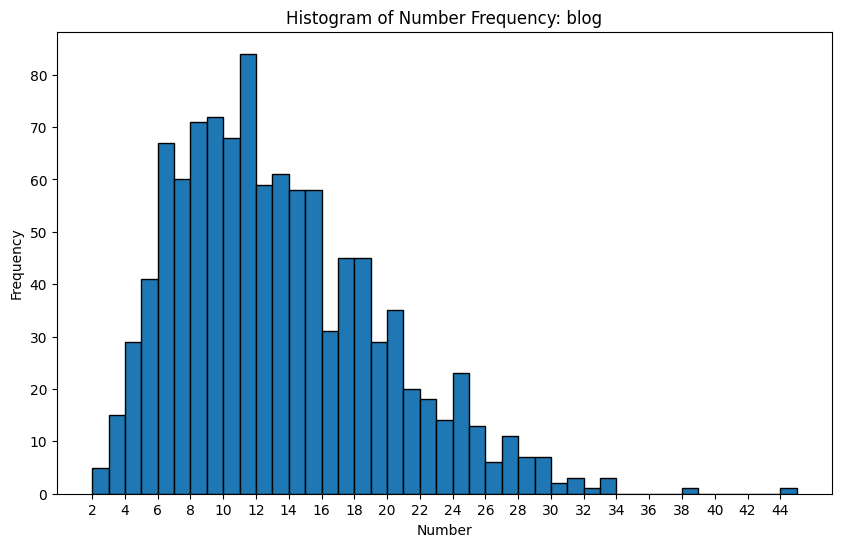

youtube.txt	Total examples = 354 


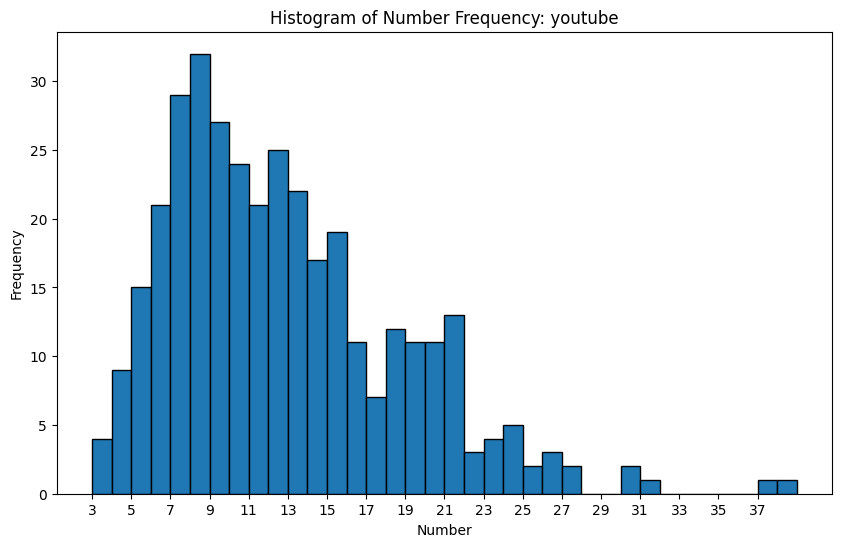

news.txt	Total examples = 307 


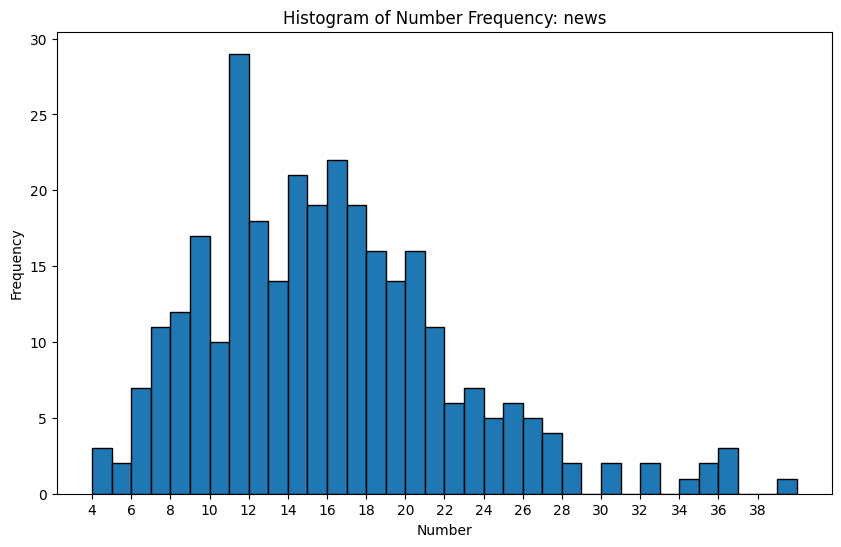

total.txt	Total examples = 1724 


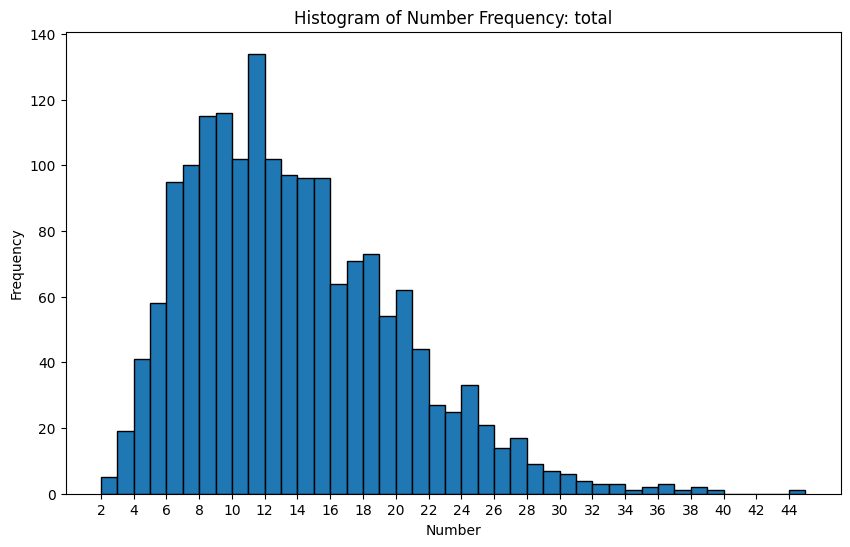

In [7]:
data_type_li = ["blog", 'youtube', 'news', 'total']

data_dir = "./"
for data_type in data_type_li:
    inputs, targets = prepare_aste_universal(data_dir, data_type)
    word_counts = [len(sentence.split()) for sentence in inputs]
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=range(min(word_counts), max(word_counts) + 2), edgecolor='black',  color=["#1f77b4"])
    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Number Frequency: {data_type}')
    plt.xticks(range(min(word_counts), max(word_counts) + 1, 2))
    plt.show()

## 감성 개수 차트

In [8]:
def count_tags(sentences):
    tags = ['<pos>', '<neg>', '<neu>']
    sent_count = {}
    count_per_sentence = {'<pos>': 0, '<neg>': 0, '<neu>': 0}
    category_sentence = {'<pos>': 0, '<neg>': 0, '<neu>': 0, '<mixed>': 0}

    for s in sentences:

        count = {tag: s.count(tag) for tag in tags}
        for k, v in count.items():
            count_per_sentence[k] += v
        if count['<pos>'] > 0 and count['<neg>'] == 0 and count['<neu>'] == 0:
            category_sentence['<pos>'] += 1
        elif count['<pos>'] == 0 and count['<neg>'] > 0 and count['<neu>'] == 0:
            category_sentence['<neg>'] += 1
        elif count['<pos>'] == 0 and count['<neg>'] == 0 and count['<neu>'] > 0:
            category_sentence['<neu>'] += 1
        else:
            category_sentence['<mixed>'] += 1
        total = sum(count.values())
        if total not in sent_count:
            sent_count[total] = 0
        sent_count[total] += 1

    return sent_count, count_per_sentence, category_sentence

blog.txt	Total examples = 1063 
sent_count
{1: 857, 3: 14, 2: 192}


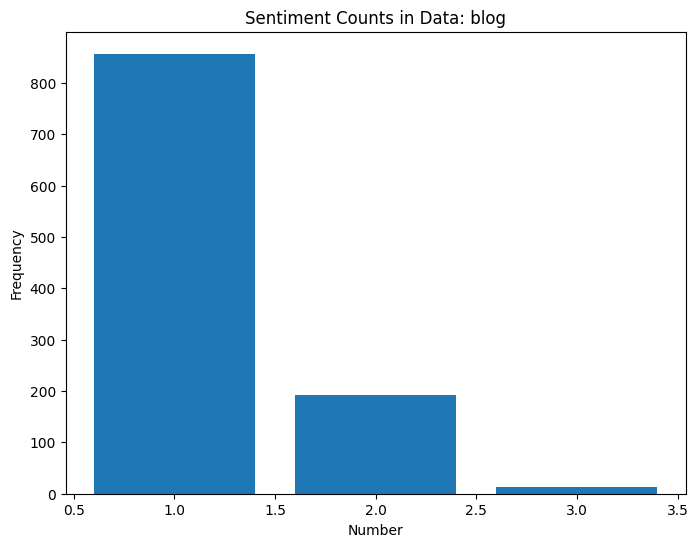

count_per_sentence
{'<pos>': 882, '<neg>': 348, '<neu>': 53}


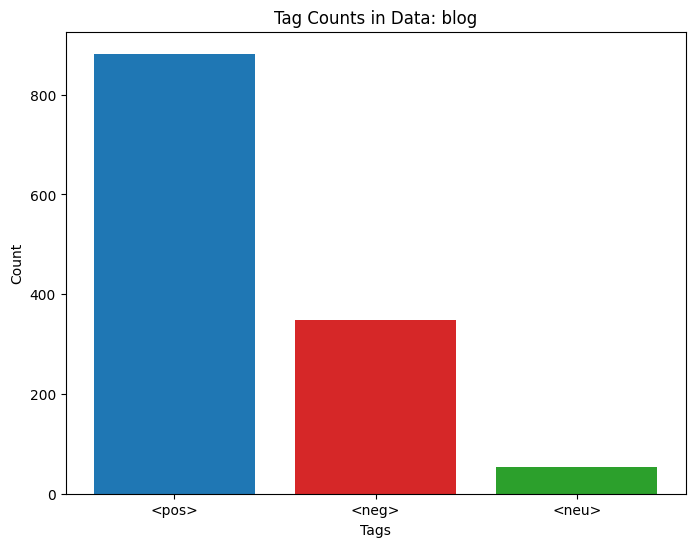

category_sentence
{'<pos>': 697, '<neg>': 271, '<neu>': 35, '<mixed>': 60}


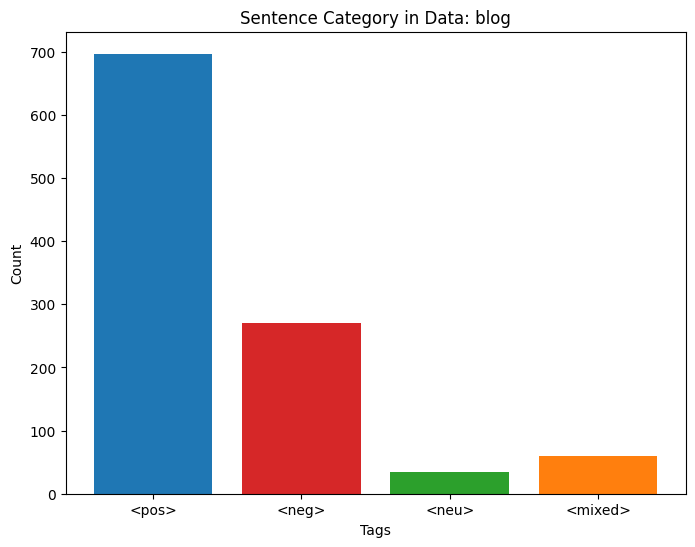

youtube.txt	Total examples = 354 
sent_count
{1: 332, 2: 22}


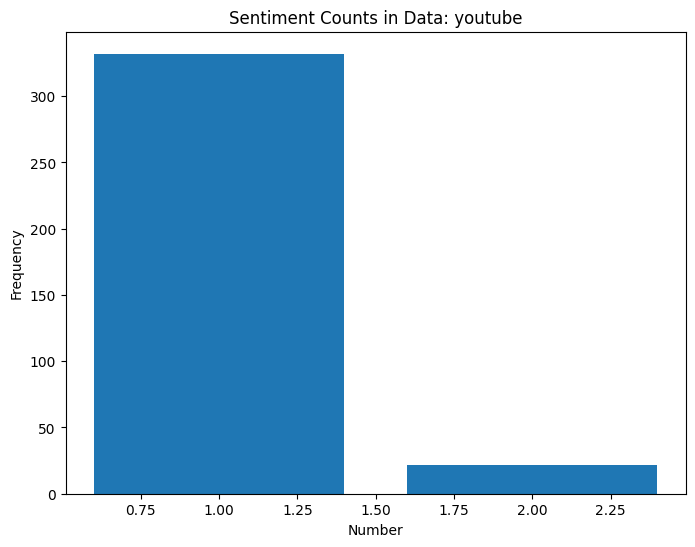

count_per_sentence
{'<pos>': 230, '<neg>': 137, '<neu>': 9}


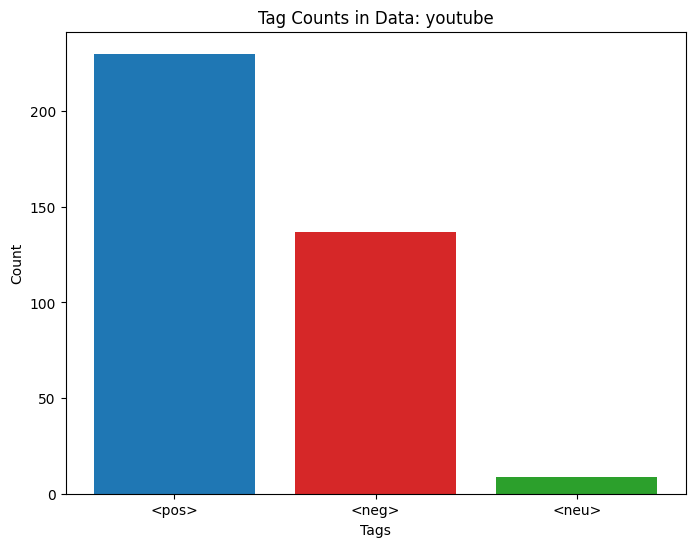

category_sentence
{'<pos>': 216, '<neg>': 124, '<neu>': 8, '<mixed>': 6}


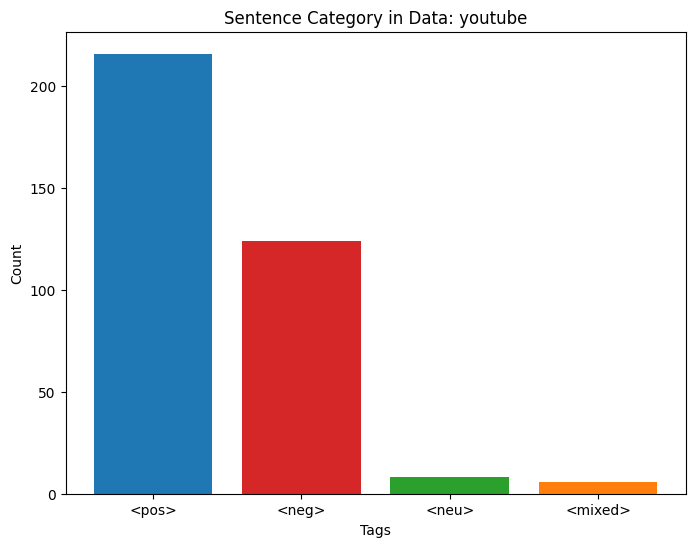

news.txt	Total examples = 307 
sent_count
{1: 243, 2: 59, 3: 5}


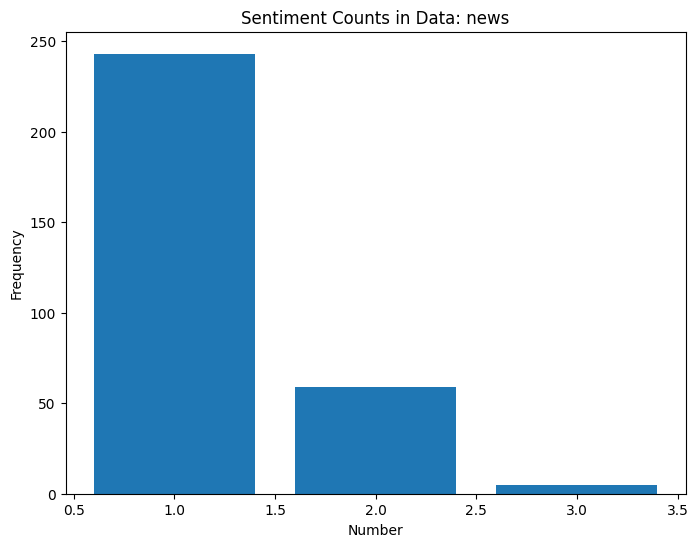

count_per_sentence
{'<pos>': 123, '<neg>': 221, '<neu>': 32}


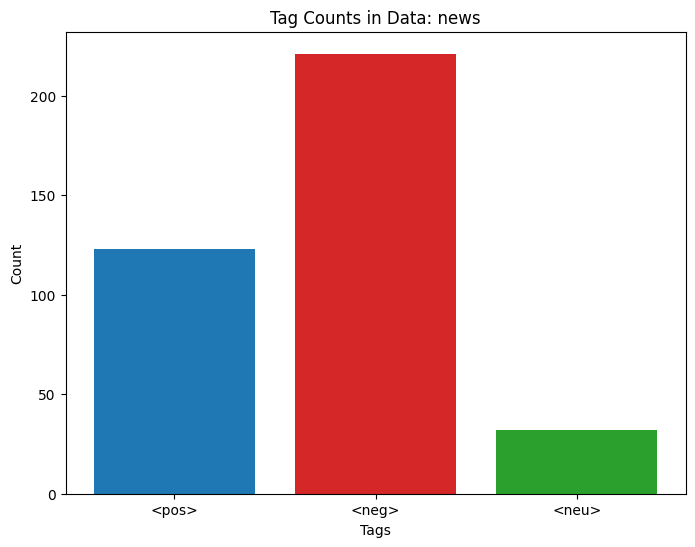

category_sentence
{'<pos>': 89, '<neg>': 177, '<neu>': 26, '<mixed>': 15}


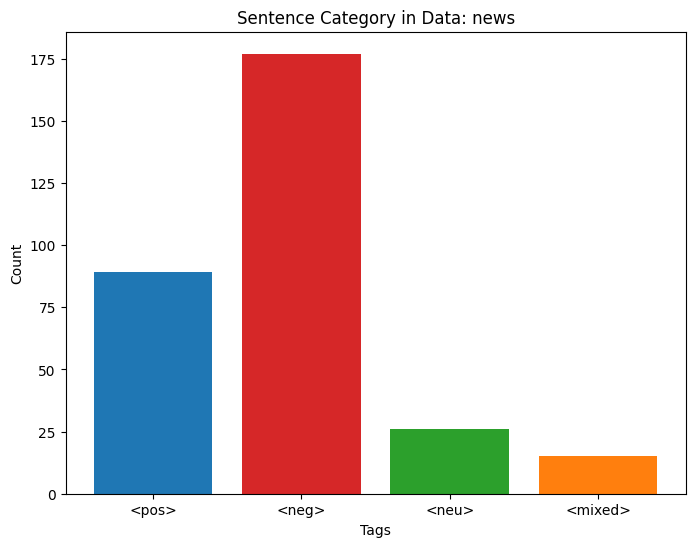

total.txt	Total examples = 1724 
sent_count
{1: 1432, 2: 273, 3: 19}


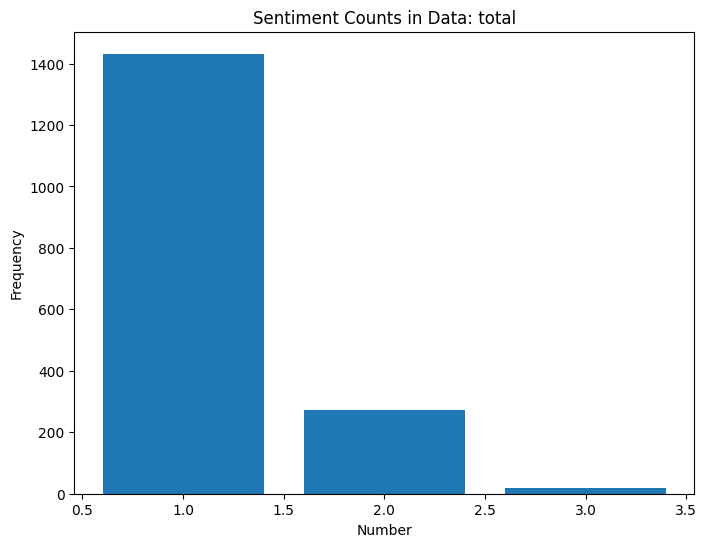

count_per_sentence
{'<pos>': 1235, '<neg>': 706, '<neu>': 94}


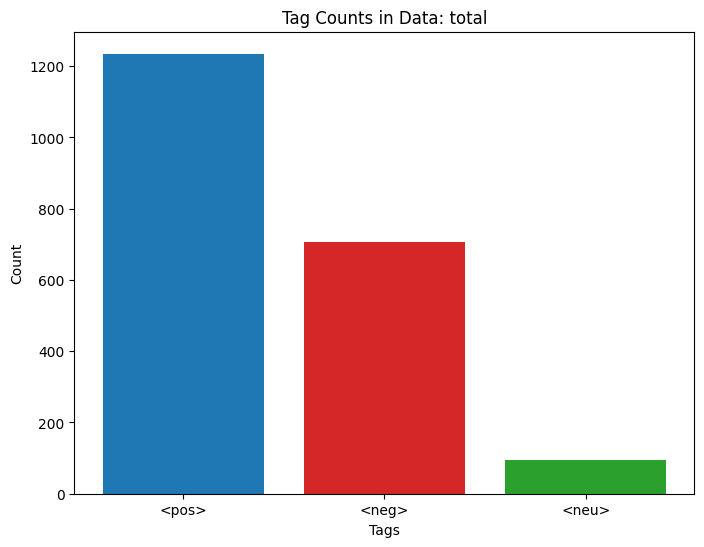

category_sentence
{'<pos>': 1002, '<neg>': 572, '<neu>': 69, '<mixed>': 81}


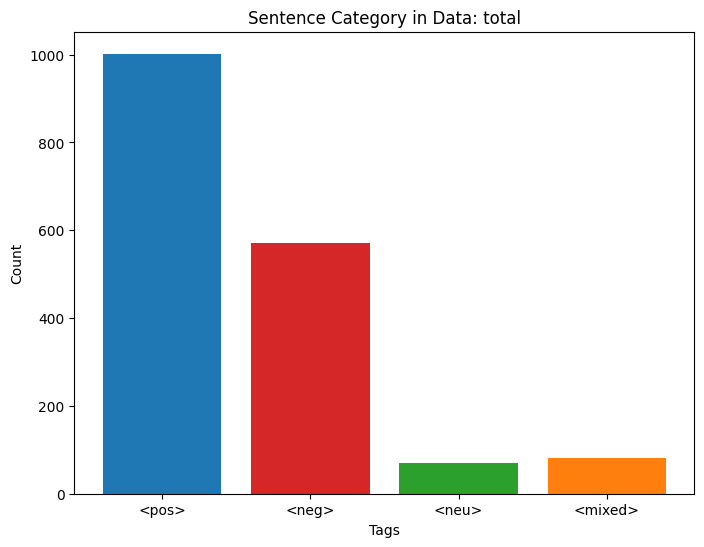

In [9]:
data_type_li = ["blog", 'youtube', 'news', 'total']

data_dir = "./"
for data_type in data_type_li:
    inputs, targets = prepare_aste_universal(data_dir, data_type)
    sent_count, count_per_sentence, category_sentence = count_tags(targets)
    # 문장별 감성 개수
    print('sent_count')
    print(sent_count)
    plt.figure(figsize=(8, 6))
    plt.bar(sent_count.keys(), sent_count.values(), color=["#1f77b4"])
    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.title(f'Sentiment Counts in Data: {data_type}')
    plt.show()
    # 문장내 감성 개수
    print('count_per_sentence')
    print(count_per_sentence)
    plt.figure(figsize=(8, 6))
    plt.bar(count_per_sentence.keys(), count_per_sentence.values(), color=["#1f77b4","#d62728", "#2ca02c","#ff7f0e","#9467bd","#8c564b","#e377c2","#7f7f7f","#bcbd22","#17becf"])
    plt.xlabel('Tags')
    plt.ylabel('Count')
    plt.title(f'Tag Counts in Data: {data_type}')
    plt.show()
    # 문장내 감성 개수
    print('category_sentence')
    print(category_sentence)
    plt.figure(figsize=(8, 6))
    plt.bar(category_sentence.keys(), category_sentence.values(), color=["#1f77b4","#d62728","#2ca02c","#ff7f0e","#9467bd","#8c564b","#e377c2","#7f7f7f","#bcbd22","#17becf"])
    plt.xlabel('Tags')
    plt.ylabel('Count')
    plt.title(f'Sentence Category in Data: {data_type}')
    plt.show()

## 영어 토큰 개수 차트

laptop14.txt	Total examples = 1453 


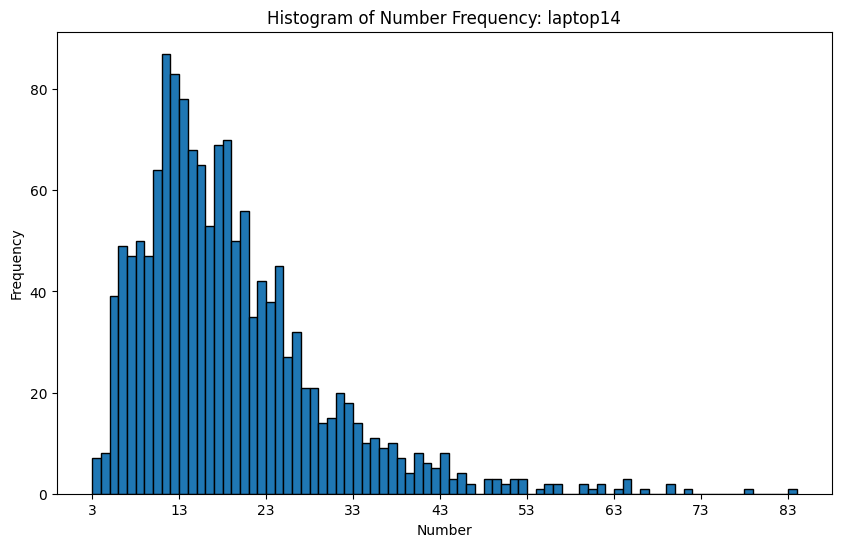

res16.txt	Total examples = 1393 


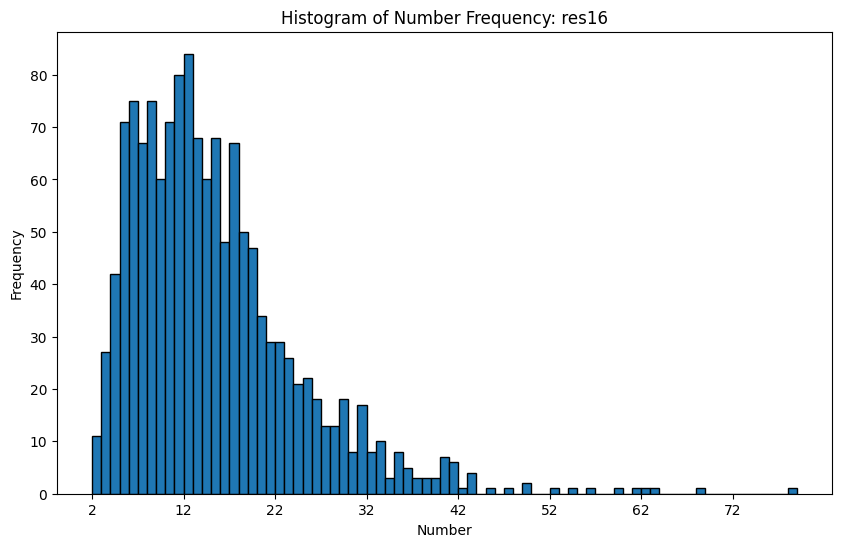

In [10]:
data_type_li = ["laptop14", 'res16']

data_dir = "./"
for data_type in data_type_li:
    inputs, targets = prepare_aste_universal(data_dir, data_type)
    word_counts = [len(sentence.split()) for sentence in inputs]
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=range(min(word_counts), max(word_counts) + 2), edgecolor='black')
    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Number Frequency: {data_type}')
    plt.xticks(range(min(word_counts), max(word_counts) + 1, 10))
    plt.show()

## 영어 감성 개수 차트

laptop14.txt	Total examples = 1453 
sent_count
{1: 862, 3: 130, 4: 47, 2: 391, 5: 12, 6: 10, 7: 1}


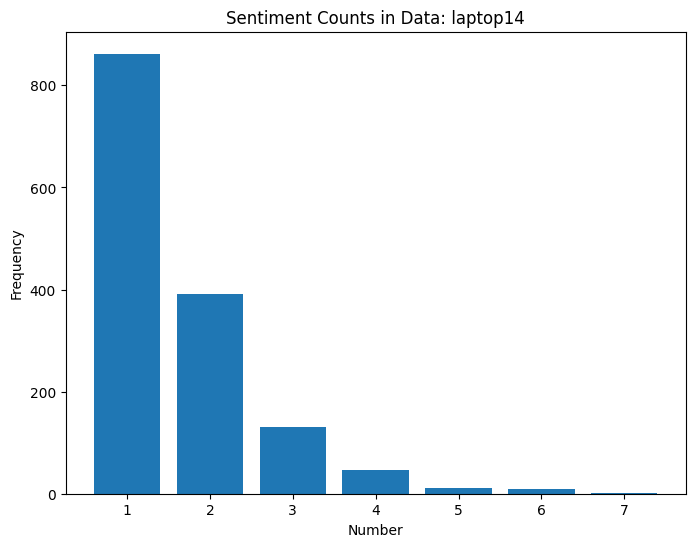

count_per_sentence
{'<pos>': 1350, '<neg>': 774, '<neu>': 225}


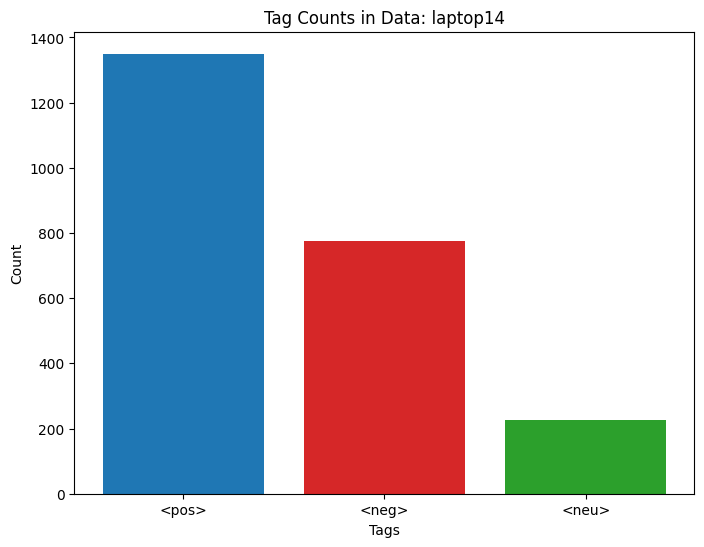

category_sentence
{'<pos>': 741, '<neg>': 516, '<neu>': 121, '<mixed>': 75}


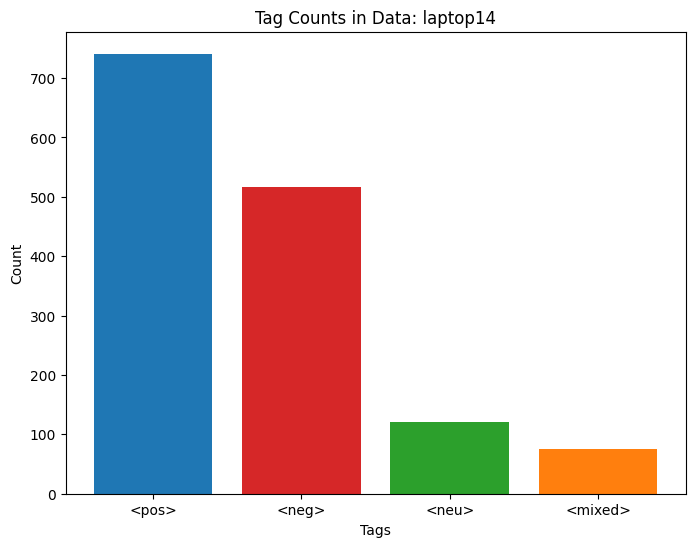

res16.txt	Total examples = 1393 
sent_count
{2: 390, 1: 814, 6: 3, 3: 119, 4: 57, 5: 10}


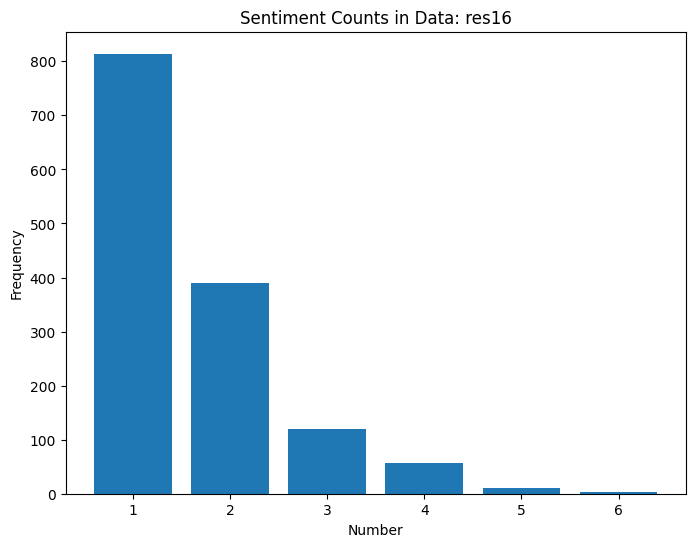

count_per_sentence
{'<pos>': 1674, '<neg>': 483, '<neu>': 90}


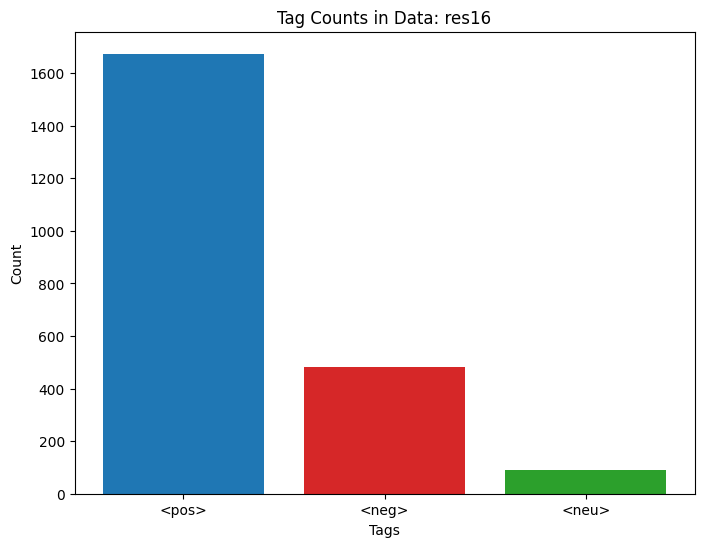

category_sentence
{'<pos>': 983, '<neg>': 283, '<neu>': 54, '<mixed>': 73}


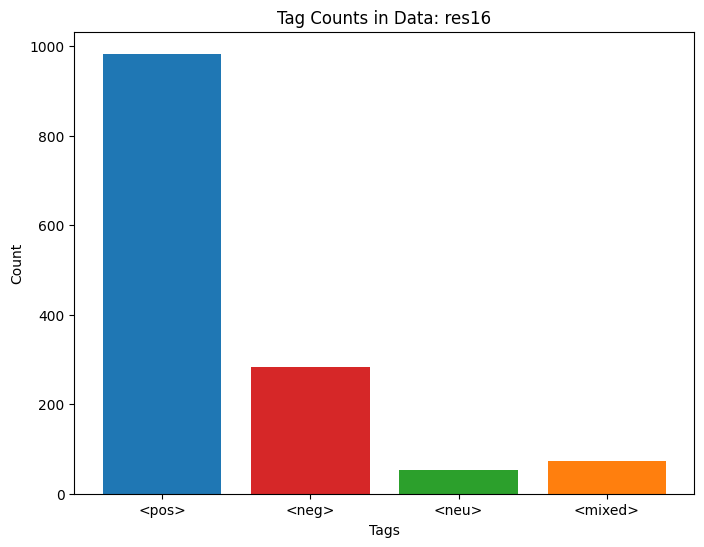

In [12]:
data_type_li = ["laptop14", 'res16']

data_dir = "./"
for data_type in data_type_li:
    inputs, targets = prepare_aste_universal(data_dir, data_type)
    sent_count, count_per_sentence, category_sentence = count_tags(targets)
    # 문장별 감성 개수
    print('sent_count')
    print(sent_count)
    plt.figure(figsize=(8, 6))
    plt.bar(sent_count.keys(), sent_count.values(), color=['#1f77b4'])
    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.title(f'Sentiment Counts in Data: {data_type}')
    plt.show()
    # 문장내 감성 개수
    print('count_per_sentence')
    print(count_per_sentence)
    plt.figure(figsize=(8, 6))
    plt.bar(count_per_sentence.keys(), count_per_sentence.values(), color=["#1f77b4","#d62728", "#2ca02c","#ff7f0e","#9467bd","#8c564b","#e377c2","#7f7f7f","#bcbd22","#17becf"])
    plt.xlabel('Tags')
    plt.ylabel('Count')
    plt.title(f'Tag Counts in Data: {data_type}')
    plt.show()
    # 문장내 감성 개수
    print('category_sentence')
    print(category_sentence)
    plt.figure(figsize=(8, 6))
    plt.bar(category_sentence.keys(), category_sentence.values(), color=["#1f77b4","#d62728", "#2ca02c","#ff7f0e","#9467bd","#8c564b","#e377c2","#7f7f7f","#bcbd22","#17becf"])
    plt.xlabel('Tags')
    plt.ylabel('Count')
    plt.title(f'Tag Counts in Data: {data_type}')
    plt.show()